In [1]:
#!sudo apt install tesseract-ocr
#!pip install pytesseract
#!pip install scikit-image

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import urllib
from matplotlib.pyplot import imshow
%matplotlib inline
import cv2
from skimage.io import imread
import os

In [3]:
image_url='https://raw.githubusercontent.com/jbm4/Best_WWF_Words/master/IMG_2574.jpeg'
im=imread(image_url)


In [4]:
def image_preprocessing(im):
  gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3,3), 0)
  ret,thresh = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
  #image_img= Image.fromarray(thresh)
  return np.asarray(thresh)

def split_board(board_image):
    M = board_image.shape[0]/15
    N = board_image.shape[1]/15

    image_tiles = [board_image[x:round(x+M),y:round(y+N)] for x in range(0,board_image.shape[0],round(M)) for y in range(0,board_image.shape[1],round(N))]
    full_tiles=[i for i in image_tiles if i.shape[0]*i.shape[1]>1000]
    return full_tiles

def tile_to_letter(tile_image):
    #gray = cv2.cvtColor(tile_image, cv2.COLOR_BGR2GRAY)
    #blur = cv2.GaussianBlur(gray, (3,3), 0)
    ##thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]#
    #thresh = cv2.threshold(blur, 100, 255, cv2.THRESH_BINARY)[1]
    ##text=''#
    thresh=tile_image#
    text = pytesseract.image_to_string(thresh, lang='eng', config='--psm 10, -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ')
    return text.strip()

def board_image_to_array(board_image):
    thresholded_image=image_preprocessing(board_image)
    image_tiles=split_board(thresholded_image)
    #image_tiles=split_board(board_image)
    board_array=np.empty(len(image_tiles), dtype=str)
    for i, tile in enumerate(image_tiles):
        letter=tile_to_letter(tile)
        #print(letter)
        #print(i)#
        board_array[i]=letter
    return board_array.reshape((15,15))

#TODO: add to this
def replace_bad_letters(board_array):
    #can add to the replace dict here
    letter_replace_dict={'|':'I', ']':'I', '[':'I'}
    #idx = np.nonzero(letter_replace_dict.keys() == board_array[:,None])[1]
    #out = np.asarray(letter_replace_dict.values())[idx]
    #out=np.vectorize(letter_replace_dict.get)(board_array)
    out = np.copy(board_array)
    for k, v in letter_replace_dict.items(): out[board_array==k] = v

    return out

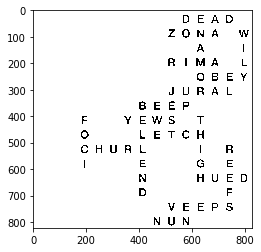

In [5]:
plt.imshow(image_preprocessing(im), cmap = plt.cm.gray)
plt.show()

In [ ]:
board_array=board_image_to_array(im)
board_array

array([['', '', '', '', '', '', '', '', '', '', 'D', 'E', 'A', 'D', ''],
       ['', '', '', '', '', '', '', '', '', 'Z', 'O', 'N', 'A', '', 'W'],
       ['', '', '', '', '', '', '', '', '', '', '', 'A', '', '', 'I'],
       ['', '', '', '', '', '', '', '', '', 'R', ']', 'M', 'A', '', 'L'],
       ['', '', '', '', '', '', '', '', '', '', '', 'O', 'B', 'E', 'Y'],
       ['', '', '', '', '', '', '', '', '', 'J', 'U', 'R', 'A', 'L', ''],
       ['', '', '', '', '', '', '', 'B', 'E', 'E', 'P', '', '', '', ''],
       ['', '', '', 'F', '', '', 'Y', 'E', 'W', 'S', '', 'T', '', '', ''],
       ['', '', '', 'O', '', '', '', 'L', 'E', 'T', 'C', 'H', '', '', ''],
       ['', '', '', 'C', 'H', 'U', 'R', 'L', '', '', '', '|', '', 'R',
        ''],
       ['', '', '', '|', '', '', '', 'E', '', '', '', 'G', '', 'E', ''],
       ['', '', '', '', '', '', '', 'N', '', '', '', 'H', 'U', 'E', 'D'],
       ['', '', '', '', '', '', '', 'D', '', '', '', '', '', 'F', ''],
       ['', '', '', '', '', '', '', 

In [ ]:
pd.DataFrame(replace_bad_letters(board_array))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,,,,,,,,,,,D,E,A,D,
1,,,,,,,,,,Z,O,N,A,,W
2,,,,,,,,,,,,A,,,I
3,,,,,,,,,,R,I,M,A,,L
4,,,,,,,,,,,,O,B,E,Y
5,,,,,,,,,,J,U,R,A,L,
6,,,,,,,,B,E,E,P,,,,
7,,,,F,,,Y,E,W,S,,T,,,
8,,,,O,,,,L,E,T,C,H,,,
9,,,,C,H,U,R,L,,,,I,,R,


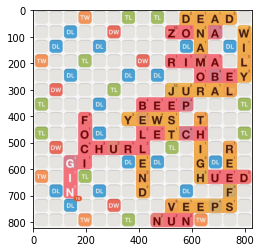

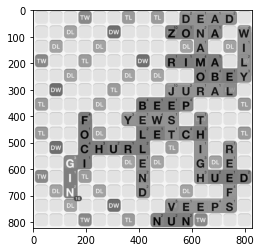

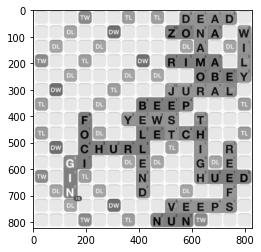

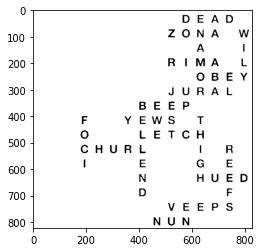

In [ ]:
plt.imshow(im)
plt.show()


gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#ret,thresh1 = cv2.threshold(gray,95,255,cv2.THRESH_BINARY)
##retval2,threshold2 = cv2.threshold(grayscaled,125,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
##th3 = cv2.adaptiveThreshold(tiles[90],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.imshow(gray, cmap = plt.cm.gray)
plt.show()

blur = cv2.GaussianBlur(gray, (3,3), 0)
plt.imshow(blur, cmap = plt.cm.gray)
plt.show()

ret,thresh1 = cv2.threshold(blur,50,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap = plt.cm.gray)
plt.show()


In [ ]:
#This is for attempting to get the boxes info for the whole image
#doesn't seem to work
from pytesseract import pytesseract as pt
threshed_im=image_preprocessing(im)
pil_img=Image.fromarray(threshed_im)
ret = pt.image_to_boxes(pil_img, lang="eng", output_type=pytesseract.Output.STRING,
    config='--psm 3, -oem 0, -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ')
ret.splitlines()

Now, going to try to find the characters through contours

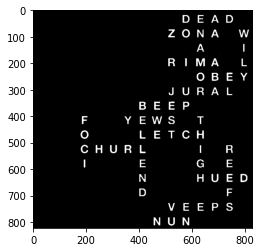

In [ ]:
ret,thresh_inv = cv2.threshold(thresh1,50,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh_inv, cmap = plt.cm.gray)
plt.show()

In [ ]:
#finding and plotting the contours

import imutils
cnts = cv2.findContours(thresh_inv,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE,)
cnts = imutils.grab_contours(cnts)


In [ ]:
image=im
# loop over the contours
for c in cnts:
  # compute the center of the contour
  M = cv2.moments(c)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  # draw the contour and center of the shape on the image
  cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
  #cv2.circle(image, (cX, cY), 7, (255, 255, 255), -1)
  #cv2.putText(image, "center", (cX - 20, cY - 20),
  #cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
  # show the image
  #cv2.imshow("Image", image)
  #cv2.waitKey(0)
